# EDA

### This notebook contains some exploratory data analysis for the first subtask.

Firstly, we find where we stored merged data. This was done with a merge script in this folder.

In [3]:
from pathlib import Path
wd = Path.cwd()
wd = wd.parent
wd = wd / 'merged_data' 
sub1 = str(wd) + '/subtask1.parquet'
sub2 = str(wd) + '/subtask1_test.parquet'
print(sub1)
print(sub2)

/home/mkukic/projektR2025/merged_data/subtask1.parquet
/home/mkukic/projektR2025/merged_data/subtask1_test.parquet


Let's see some data rows

In [4]:
import pandas as pd
df = pd.read_parquet(sub1)
df2 = pd.read_parquet(sub2)
print(df2.tail())
print(df.tail())
df = pd.concat([df, df2], ignore_index=True)
df.tail()

    lang         art_name      entity start   end      class1  \
599   RU  RU-URW-1139.txt      Запада   212   217  Antagonist   
600   RU  RU-URW-1139.txt      России   631   636    Innocent   
601   RU  RU-URW-1139.txt        НАТО   993   996  Antagonist   
602   RU  RU-URW-1139.txt  Зеленского  2181  2190  Antagonist   
603   RU  RU-URW-1139.txt       Киеву  2414  2418  Antagonist   

                classes2                                               text  
599        [Conspirator]  Битва за воздух как проба стойкости русских\n2...  
600             [Victim]  Битва за воздух как проба стойкости русских\n2...  
601  [Foreign Adversary]  Битва за воздух как проба стойкости русских\n2...  
602  [Foreign Adversary]  Битва за воздух как проба стойкости русских\n2...  
603         [Instigator]  Битва за воздух как проба стойкости русских\n2...  
     lang         art_name           entity start   end       class1  \
2897   RU  RU-URW-1156.txt          Россией   559   565  Protagonist 

,lang,art_name,entity,start,end,class1,classes2,text
3501,RU,RU-URW-1139.txt,Запада,212,217,Antagonist,[Conspirator],Битва за воздух как проба стойкости русских\n2...
3502,RU,RU-URW-1139.txt,России,631,636,Innocent,[Victim],Битва за воздух как проба стойкости русских\n2...
3503,RU,RU-URW-1139.txt,НАТО,993,996,Antagonist,[Foreign Adversary],Битва за воздух как проба стойкости русских\n2...
3504,RU,RU-URW-1139.txt,Зеленского,2181,2190,Antagonist,[Foreign Adversary],Битва за воздух как проба стойкости русских\n2...
3505,RU,RU-URW-1139.txt,Киеву,2414,2418,Antagonist,[Instigator],Битва за воздух как проба стойкости русских\n2...


## Our tasks

### Multiclass labeling 

Firstly we need to label each named entity with a label protagonist, antagonist or innocent.
Let's look at the distribution of each label in the whole dataset.

class1
Antagonist     1688
Protagonist    1043
Innocent        775
Name: count, dtype: int64


Text(0.5, 1.0, 'Bar Graph of Label Counts')

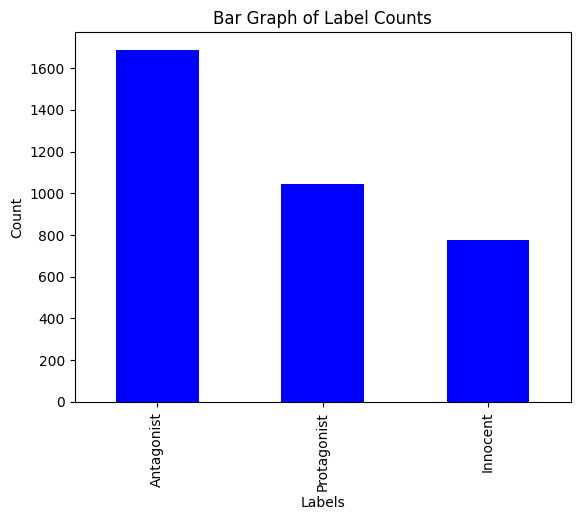

In [5]:
import matplotlib.pyplot as plt
label_counts = df['class1'].value_counts()
print(label_counts)
label_counts.plot(kind='bar', color='blue')
plt.xlabel('Labels',)
plt.ylabel('Count')
plt.title('Bar Graph of Label Counts')

Just to keep in mind, unbalanced distribution of labels could badly influence our models' training and generalization.

#### The dataset contains 5 languages. Let's se the distribution of labels in each category.
#### Also we will view how much data we have representing every language.
Firstly data entries per languge.

lang
BG    479
Name: count, dtype: int64 lang
EN    505
Name: count, dtype: int64 lang
HI    1208
Name: count, dtype: int64 lang
PT    861
Name: count, dtype: int64 lang
RU    453
Name: count, dtype: int64


<BarContainer object of 5 artists>

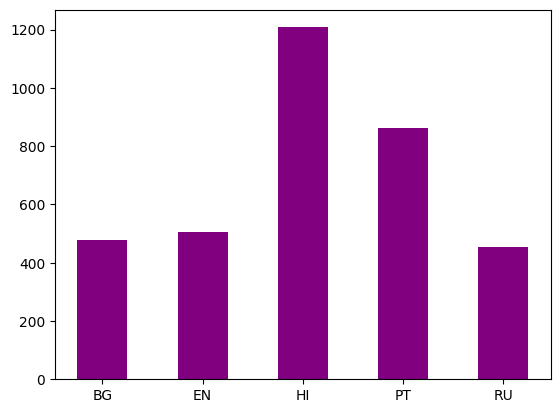

In [6]:
df_bg = df[ df['lang'] == 'BG']
df_en = df[ df['lang'] == 'EN']
df_hi = df[ df['lang'] == 'HI']
df_pt = df[ df['lang'] == 'PT']
df_ru = df[ df['lang'] == 'RU']
x = ["BG", "EN", "HI", "PT", "RU"]
y = [len(df_bg), len(df_en), len(df_hi), len(df_pt), len(df_ru)]
print(df_bg['lang'].value_counts(),
df_en['lang'].value_counts(),
df_hi['lang'].value_counts(),
df_pt['lang'].value_counts(),
df_ru['lang'].value_counts())
plt.bar(x, y, width=0.5, color='purple')

## Labels per country and category

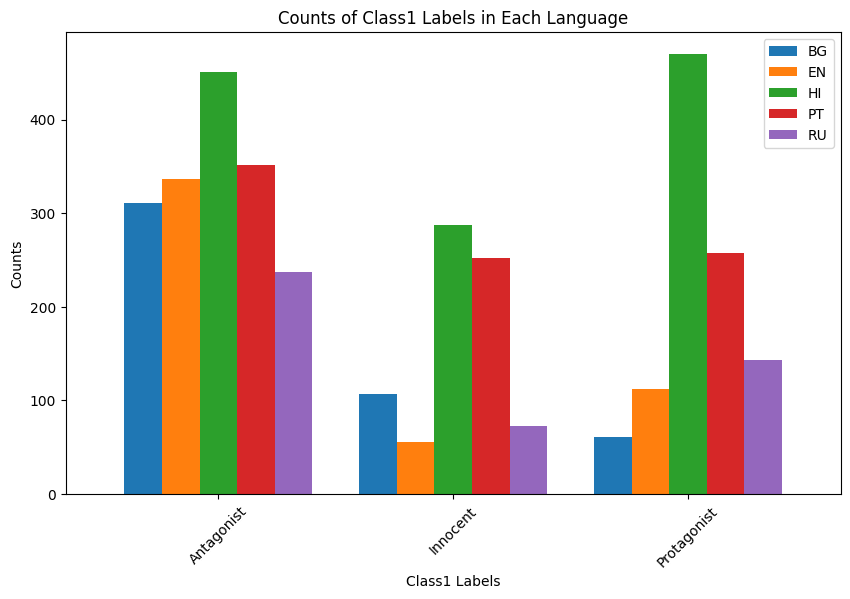

In [7]:
count_bg = df_bg['class1'].value_counts()
count_en = df_en['class1'].value_counts()
count_hi = df_hi['class1'].value_counts()
count_pt = df_pt['class1'].value_counts()
count_ru = df_ru['class1'].value_counts()

counts_df = pd.DataFrame({
    'BG': count_bg,
    'EN': count_en,
    'HI': count_hi,
    'PT': count_pt,
    'RU': count_ru
}).fillna(0)  
ax = counts_df.plot(kind='bar', width=0.8, figsize=(10, 6))

plt.xlabel('Class1 Labels')
plt.ylabel('Counts')
plt.title('Counts of Class1 Labels in Each Language')
plt.xticks(rotation=45)  

plt.show()

class1
Antagonist     0.649269
Innocent       0.223382
Protagonist    0.127349
Name: count, dtype: float64 class1
Antagonist     0.667327
Protagonist    0.221782
Innocent       0.110891
Name: count, dtype: float64 class1
Protagonist    0.389073
Antagonist     0.373344
Innocent       0.237583
Name: count, dtype: float64 class1
Antagonist     0.408827
Protagonist    0.298490
Innocent       0.292683
Name: count, dtype: float64 class1
Antagonist     0.275261
Protagonist    0.166086
Innocent       0.084785
Name: count, dtype: float64


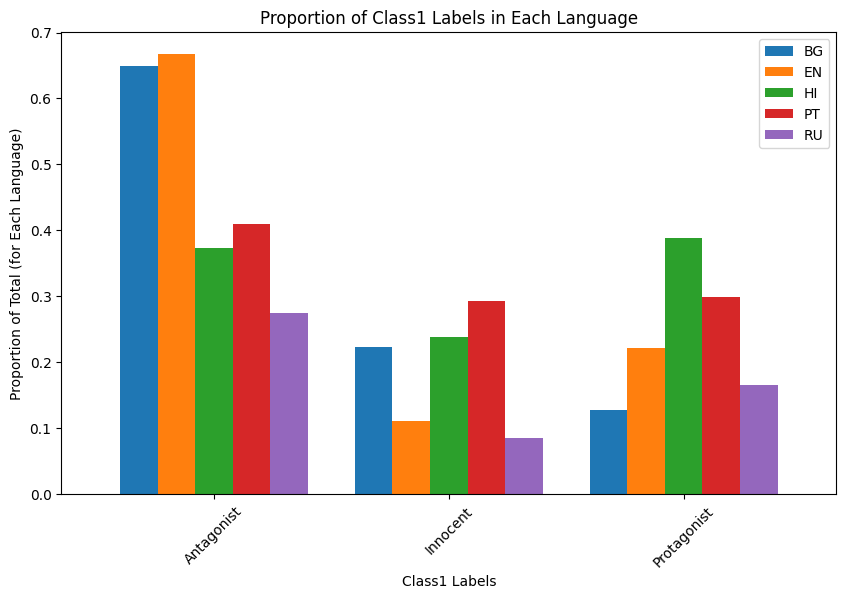

In [8]:
# Get value_counts for 'class1' in each DataFrame
count_bg = df_bg['class1'].value_counts()
count_en = df_en['class1'].value_counts()
count_hi = df_hi['class1'].value_counts()
count_pt = df_pt['class1'].value_counts()
count_ru = df_ru['class1'].value_counts()

# Calculate the total count of 'class1' for each language
total_bg = df_bg['class1'].count()
total_en = df_en['class1'].count()
total_hi = df_hi['class1'].count()
total_pt = df_pt['class1'].count()
total_ru = df_pt['class1'].count()

# Calculate the proportions for each label within each language
prop_bg = count_bg / total_bg
prop_en = count_en / total_en
prop_hi = count_hi / total_hi
prop_pt = count_pt / total_pt
prop_ru = count_ru / total_ru

print(prop_bg,prop_en,prop_hi,prop_pt, prop_ru)
# Create a DataFrame to hold the proportions for each language
prop_df = pd.DataFrame({
    'BG': prop_bg,
    'EN': prop_en,
    'HI': prop_hi,
    'PT': prop_pt,
    'RU': prop_ru
}).fillna(0)  # Fill NaN with 0s for missing categories

# Plotting the bar plot
ax = prop_df.plot(kind='bar', width=0.8, figsize=(10, 6))

# Add labels and title
plt.xlabel('Class1 Labels')
plt.ylabel('Proportion of Total (for Each Language)')
plt.title('Proportion of Class1 Labels in Each Language')
plt.xticks(rotation=45)  # Rotate x-ticks for better visibility

# Display the plot
plt.show()

Classifying article as Russia-Ukraine war or climate change

In [9]:
import re
climate_keywords = {
    'EN': [
        "climate", "change", "warming", "carbon", "emissions", "greenhouse", "fossil", "pollution", 
        "sustainability", "deforestation", "climate justice", "activism", "accountability", "policy", 
        "impact", "reduction", "environment", "environmental", "clean energy", "renewable", "global warming", 
        "paris agreement", "cop", "activists", "debate", "responsibility", "government", "inaction", 
        "failure", "protest", "lobby", "oil", "gas", "corporations", "proposals", "green energy", 
        "eco-friendly", "transition", "scandal", "neglect", "exploitation", "polluters", "reform", 
        "carbon tax", "carbon footprint", "climate refugees", "greenwash"
    ],
    'PT': [
        "clima", "mudança", "aquecimento", "carbono", "emissões", "gases", "fósseis", "poluição", 
        "sustentabilidade", "desmatamento", "justiça climática", "ativismo", "responsabilidade", "política", 
        "impacto", "redução", "ambiente", "ambiental", "energia limpa", "renovável", "aquecimento global", 
        "acordo de paris", "cop", "ativistas", "debate", "responsabilidade", "governo", "falta de ação", 
        "fracasso", "protesto", "lobby", "petróleo", "gás", "corporações", "propostas", "energia verde", 
        "eco-friendly", "transição", "escândalo", "negligência", "exploração", "poluidores", "reforma", 
        "imposto sobre carbono", "pegada de carbono", "refugiados climáticos", "greenwash"
    ],
    'HI': [
        "जलवायु", "परिवर्तन", "तापन", "कार्बन", "उत्सर्जन", "गैस", "जीवाश्म", "प्रदूषण", 
        "सततता", "वनस्पति नाश", "जलवायु न्याय", "आंदोलन", "जिम्मेदारी", "नीति", 
        "प्रभाव", "कमी", "पर्यावरण", "पर्यावरणीय", "स्वच्छ ऊर्जा", "नवीकरणीय", "वैश्विक तापन", 
        "पेरिस समझौता", "सीओपी", "कार्यकर्ता", "बहस", "जिम्मेदारी", "सरकार", "क्रियाविहीनता", 
        "विफलता", "प्रदर्शन", "लॉबी", "तेल", "गैस", "संगठनों", "प्रस्ताव", "हरित ऊर्जा", 
        "इको-फ्रेंडली", "संक्रमण", "घोटाला", "लापरवाही", "शोषण", "प्रदूषणकर्ता", "सुधार", 
        "कार्बन कर", "कार्बन पदचिह्न", "जलवायु शरणार्थी", "ग्रीनवाश"
    ],
    'BG': [
        "климат", "промяна", "затопляне", "въглерод", "емисии", "гази", "изкопаеми", "замърсяване", 
        "устойчивост", "изсичане на гори", "климатични права", "активизъм", "отговорност", "политика", 
        "въздействие", "намаляване", "околната среда", "екологичен", "чиста енергия", "възобновяеми", 
        "глобално затопляне", "парижко споразумение", "коп", "активисти", "дебат", "отговорност", 
        "правителство", "бездействие", "неуспех", "протест", "лобизъм", "нефт", "газ", "корпорации", 
        "предложения", "зелена енергия", "екологичен", "преход", "скандал", "пренебрежение", "експлоатация", 
        "замърсители", "реформа", "данък върху въглерод", "въглероден отпечатък", "климатични бежанци", "гринуош"
    ],
    'RU': [
        "климат", "изменение", "потепление", "углерод", "выбросы", "парниковый", "ископаемое", "загрязнение", 
        "устойчивость", "вырубка лесов", "климатическая справедливость", "активизм", "ответственность", "политика", 
        "влияние", "сокращение", "окружающая среда", "экологический", "чистая энергия", "возобновляемая", "глобальное потепление", 
        "Парижское соглашение", "COP", "активисты", "дебаты", "ответственность", "правительство", "бездействие", 
        "провал", "протест", "лоббизм", "нефть", "газ", "корпорации", "предложения", "зеленая энергия", 
        "экологичный", "переход", "скандал", "пренебрежение", "эксплуатация", "загрязнители", "реформа", 
        "углеродный налог", "углеродный след", "климатические беженцы", "гринвошинг"
    ]
}

war_keywords = {
    'EN': [
        "russia", "ukraine", "war", "invasion", "conflict", "putin", "zelensky", 
        "nato", "donbas", "crimea", "sanctions", "military", "refugees", 
        "ceasefire", "frontline", "troops", "resistance", "bombing", 
        "artillery", "territory", "proxy", "east", "donetsk", 
        "luhansk", "kyiv", "mariupol", "offensive", "battle", "strategy", 
        "counteroffensive", "occupation", "defense", "peace", "forces", 
        "army", "airstrike", "aid", "crimes", "skirmishes", 
        "battlefield", "separatists", "allies", "supply", "defense", 
        "shelters", "peacekeeping", "crisis", "drills"
    ],
    'PT': [
        "rússia", "ucrânia", "guerra", "invasão", "conflito", "putin", "zelensky", 
        "otan", "donbas", "crimeia", "sanções", "militar", "refugiados", 
        "cessar-fogo", "frente", "tropas", "resistência", "bombardeio", 
        "artilharia", "територия", "procurador", "leste", "donetsk", 
        "lugansk", "kiev", "mariupol", "ofensiva", "batalha", "estratégia", 
        "contraofensiva", "ocupação", "defesa", "paz", "forças", 
        "exército", "ataque", "ajuda", "crimes", "escaramuças", 
        "campo", "separatistas", "aliados", "fornecimento", "defesa", 
        "abrigo", "manutenção", "crise", "exercícios"
    ],
    'HI': [
        "रूस", "यूक्रेन", "युद्ध", "आक्रमण", "संघर्ष", "पुतिन", "जेलेंस्की", 
        "नाटो", "डोनबास", "क्रीमिया", "प्रतिबंध", "सैन्य", "शरणार्थी", 
        "युद्धविराम", "अग्रिम", "सैन्य", "प्रतिकार", "बमबारी", 
        "तोपख़ाना", "क्षेत्र", "प्रॉक्सी", "पूर्व", "डोनेट्स्क", 
        "लुहान्स्क", "कीव", "मारियुपोल", "आक्रमण", "युद्ध", "रणनीति", 
        "काउंटरऑफेंसिव", "आधिपत्य", "रक्षा", "शांति", "बल", 
        "सेना", "एयरस्ट्राइक", "सैन्य", "अपराध", "झड़प", 
        "युद्धक्षेत्र", "विभाजनकारी", "सहयोगी", "सप्लाई", "रक्षा", 
        "शेल्टर", "शांति", "संकट", "अभ्यास"
    ],
    'BG': [
        "русия", "украйна", "война", "нападение", "конфликт", "путин", "зелински", 
        "нато", "донбас", "крим", "санкции", "военен", "бежанци", 
        "прекратяване", "фронт", "войски", "съпротива", "бомбардировки", 
        "артилерия", "територия", "прокси", "изток", "донецк", 
        "луганск", "киев", "мариупол", "офанзива", "битка", "стратегия", 
        "контраофанзива", "окупация", "отбрана", "мир", "сили", 
        "армия", "въздушен", "помощ", "престъпления", "сблъсъци", 
        "бойно", "сепаратисти", "съюзници", "доставки", "отбрана", 
        "укрития", "миротворчество", "криза", "упражнения"
    ],
    'RU': [
        "россия", "украина", "война", "вторжение", "конфликт", "путин", "зеленский", 
        "нато", "донбасс", "крым", "санкции", "военные", "беженцы", 
        "перемирие", "передовая", "войска", "сопротивление", "бомбардировка", 
        "артиллерия", "территория", "прокси", "восток", "донецк", 
        "луганск", "киев", "мариуполь", "наступление", "битва", "стратегия", 
        "контрнаступление", "оккупация", "оборона", "мир", "силы", 
        "армия", "авиаудар", "помощь", "преступления", "перестрелки", 
        "поле боя", "сепаратисты", "союзники", "снабжение", "защита", 
        "убежища", "миротворцы", "кризис", "учения"
    ]
}
def determineType(row):
    text = str(row['text'])
    text = text.lower().strip().replace('\n','')
    clean_text = re.sub(r'[^\w\s]', '', text)
    cc, ru = 0, 0
    
    for z in text.split(' '):
        if z in climate_keywords[row['lang']]:
            cc+=1
        if z in war_keywords[row['lang']]:
            ru+=1
    if cc > 0 and ru == 0:
        return "Climate change"
    elif cc == 0 and ru > 0:
        return "War"
    elif cc == 0 and ru == 0:
        return "None error"
    elif cc > 0 and ru > 0:
        return "Inconclusive error"

df['artCat'] = df.apply(determineType,axis=1)


artCat
Inconclusive error    1801
War                   1417
Climate change         198
None error              90
Name: count, dtype: int64


Text(0.5, 1.0, 'Bar Graph of Label Counts')

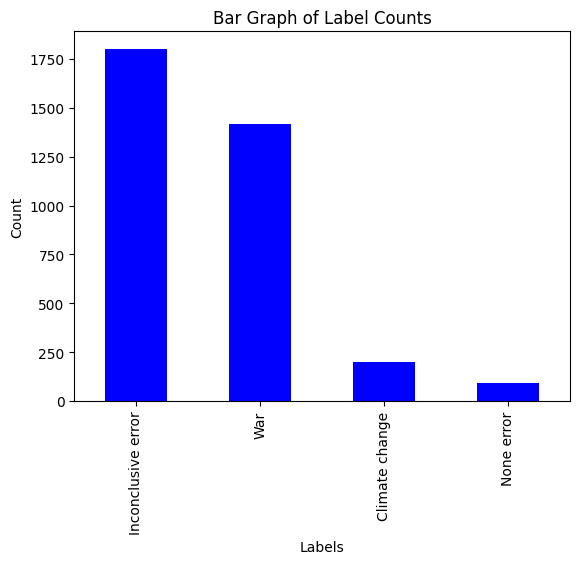

In [10]:
df.aggregate
label_counts = df['artCat'].value_counts()
print(label_counts)
label_counts.plot(kind='bar', color='blue')
plt.xlabel('Labels',)
plt.ylabel('Count')
plt.title('Bar Graph of Label Counts')

## Analysis of distance between spans in the same text

### Analysis for EN
Here is a short analysis of size of the input text, number of spans per text, as well as distance between spans in the same text.

In [11]:
df_en["start"] = df_en["start"].astype(int)
df_en["end"] = df_en["end"].astype(int)
df_en_spanEDA = df_en.sort_values(by=["art_name", "start"])

df_en_spanEDA['inter_span_distance'] = df_en_spanEDA.groupby('art_name')['start'].shift(0) - df_en_spanEDA.groupby('art_name')['end'].shift(1)

summary = df_en_spanEDA.groupby('art_name').agg(
    min_distance=('inter_span_distance', 'min'),
    max_distance=('inter_span_distance', 'max'),
    mean_distance=('inter_span_distance', 'mean'),
    stddev_distance=('inter_span_distance', 'std'),
    text_length=('text', lambda x: len(x.iloc[0])),
    span_count=('start', 'size')
).reset_index()

print(summary)
print("Mean of number of spans per text: ", summary["span_count"].mean())
print("Median of number of spans per text: ", summary["span_count"].median())

print("Mean of distances in all texts (ignoring span_count=1): ", summary["mean_distance"].mean())


                 art_name  min_distance  max_distance  mean_distance  \
0        EN_CC_100002.txt           NaN           NaN            NaN   
1        EN_CC_100003.txt         905.0         905.0     905.000000   
2        EN_CC_100004.txt         231.0        2146.0    1188.500000   
3        EN_CC_100005.txt        1941.0        1941.0    1941.000000   
4        EN_CC_100012.txt         439.0        1282.0     853.000000   
..                    ...           ...           ...            ...   
128  EN_UA_DEV_100033.txt         140.0        4426.0    1955.333333   
129      EN_UA_DEV_20.txt         632.0        2892.0    1342.750000   
130     EN_UA_DEV_213.txt           6.0        2228.0     422.894737   
131     EN_UA_DEV_214.txt          12.0         984.0     285.600000   
132     EN_UA_DEV_215.txt           NaN           NaN            NaN   

     stddev_distance  text_length  span_count  
0                NaN         2800           1  
1                NaN         2396      

/tmp/ipykernel_94113/3802205066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en["start"] = df_en["start"].astype(int)
/tmp/ipykernel_94113/3802205066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en["end"] = df_en["end"].astype(int)


### Analysis for all languages - Merged data

In [12]:
df["start"] = df["start"].astype(int)
df["end"] = df["end"].astype(int)
df_spanDA = df.sort_values(by=["art_name", "lang", "start"])

df_spanDA['inter_span_distance'] = df_spanDA.groupby('art_name')['start'].shift(0) - df_spanDA.groupby('art_name')['end'].shift(1)

summary = df_spanDA.groupby(['art_name', 'lang']).agg(
    min_distance=('inter_span_distance', 'min'),
    max_distance=('inter_span_distance', 'max'),
    mean_distance=('inter_span_distance', 'mean'),
    stddev_distance=('inter_span_distance', 'std'),
    text_length=('text', lambda x: len(x.iloc[0])),
    span_count=('start', 'size')
).reset_index()

#print(summary)
print("Note that distance is in measured characters.")
print("Mean of inter-span-distance per text (EN): ", summary.loc[summary["lang"] == "EN", "mean_distance"].mean())
print("Mean of inter-span-distance per text (BG): ", summary.loc[summary["lang"] == "BG", "mean_distance"].mean())
print("Mean of inter-span-distance per text (PT): ", summary.loc[summary["lang"] == "PT", "mean_distance"].mean())
print("Mean of inter-span-distance per text (HI): ", summary.loc[summary["lang"] == "HI", "mean_distance"].mean())
print("Mean of inter-span-distance per text (RU): ", summary.loc[summary["lang"] == "RU", "mean_distance"].mean())

print("Mean of distances in all texts (ignoring span_count=1): ", summary["mean_distance"].mean())

#TO DO
#min and max values
#distance in nr. of words says more, as our tokenizer tokenize by words, this should be relevant for the input length


Note that distance is in measured characters.
Mean of inter-span-distance per text (EN):  689.4339481967681
Mean of inter-span-distance per text (BG):  406.66163809523806
Mean of inter-span-distance per text (PT):  409.6098924990637
Mean of inter-span-distance per text (HI):  340.7080557735109
Mean of inter-span-distance per text (RU):  322.2257246376812
Mean of distances in all texts (ignoring span_count=1):  422.1778211985444


## Analysis of entities that often occur
TO DO: exploration for NEs like Russia, Ukraine, other entities that often occur ... does the article language influence the label that is given?

Russian dataset includes only Russia-Ukraine War articles.

In [13]:
df_en_counts_Russia = pd.DataFrame({
    'Class1': ['Antagonist', 'Innocent', 'Protagonist'],
    'Count': [
        df_en[((df_en['entity'] == 'Russia') | (df_en['entity'] == 'Russians')) & (df_en['class1'] == 'Antagonist')]['entity'].count(),
        df_en[((df_en['entity'] == 'Russia') | (df_en['entity'] == 'Russians')) & (df_en['class1'] == 'Innocent')]['entity'].count(),
        df_en[((df_en['entity'] == 'Russia') | (df_en['entity'] == 'Russians')) & (df_en['class1'] == 'Protagonist')]['entity'].count(),
    ]
})

df_ru_counts_Russia = pd.DataFrame({
    'Class1': ['Antagonist', 'Innocent', 'Protagonist'],
    'Count': [
        df_ru[((df_ru['entity'] == 'Россия') | (df_ru['entity'] == 'России')) & (df_ru['class1'] == 'Antagonist')]['entity'].count(),
        df_ru[((df_ru['entity'] == 'Россия') | (df_ru['entity'] == 'России')) & (df_ru['class1'] == 'Innocent')]['entity'].count(),
        df_ru[((df_ru['entity'] == 'Россия') | (df_ru['entity'] == 'России')) & (df_ru['class1'] == 'Protagonist')]['entity'].count(),
    ]
})

print("English DataFrame Counts:")
display(df_en_counts_Russia.style.set_caption("English articles/mention: Russia"))

print("\nRussian DataFrame Counts:")
display(df_ru_counts_Russia.style.set_caption("Russian articles/mention: Russia"))

df_en_counts_Ukraine = pd.DataFrame({
    'Class1': ['Antagonist', 'Innocent', 'Protagonist'],
    'Count': [
        df_en[((df_en['entity'] == 'Ukraine') | (df_en['entity'] == 'Ukrainians')) & (df_en['class1'] == 'Antagonist')]['entity'].count(),
        df_en[((df_en['entity'] == 'Ukraine') | (df_en['entity'] == 'Ukrainians')) & (df_en['class1'] == 'Innocent')]['entity'].count(),
        df_en[((df_en['entity'] == 'Ukraine') | (df_en['entity'] == 'Ukrainians')) & (df_en['class1'] == 'Protagonist')]['entity'].count(),
    ]
})

df_ru_counts_Ukraine = pd.DataFrame({
    'Class1': ['Antagonist', 'Innocent', 'Protagonist'],
    'Count': [
        df_ru[((df_ru['entity'] == 'Украины') | (df_ru['entity'] == 'Украине') | (df_ru['entity'] == 'Украина')) & (df_ru['class1'] == 'Antagonist')]['entity'].count(),
        df_ru[((df_ru['entity'] == 'Украины') | (df_ru['entity'] == 'Украине') | (df_ru['entity'] == 'Украина'))]['entity'].count(),
        df_ru[((df_ru['entity'] == 'Украины') | (df_ru['entity'] == 'Украине') | (df_ru['entity'] == 'Украина'))]['entity'].count(),
    ]
})

print("English DataFrame Counts:")
display(df_en_counts_Ukraine.style.set_caption("English articles/mention: Ukraine"))

print("\nRussian DataFrame Counts:")
display(df_ru_counts_Ukraine.style.set_caption("Russian articles/mention: Ukraine"))


English DataFrame Counts:


,Class1,Count
0,Antagonist,28
1,Innocent,9
2,Protagonist,12



Russian DataFrame Counts:


,Class1,Count
0,Antagonist,2
1,Innocent,8
2,Protagonist,10


English DataFrame Counts:


,Class1,Count
0,Antagonist,6
1,Innocent,15
2,Protagonist,14



Russian DataFrame Counts:


,Class1,Count
0,Antagonist,19
1,Innocent,31
2,Protagonist,31


### Exploratory analysis for second class labels 

In [14]:
df_innocent = df[(df['class1'] == 'Innocent')]
print('Number of NE where first class is Innocent: ',df_innocent.shape[0])

df_victim = df_innocent[df_innocent['classes2'].apply(lambda x: 'Victim' in x)]
df_forgotten = df_innocent[df_innocent['classes2'].apply(lambda x: 'Forgotten' in x)]
df_exploited = df_innocent[df_innocent['classes2'].apply(lambda x: 'Exploited' in x)]
df_scapegoat = df_innocent[df_innocent['classes2'].apply(lambda x: 'Scapegoat' in x)]

print("Second layer labels - Victim: ", df_victim.shape[0])
print("Second layer labels - Forgotten: ", df_forgotten.shape[0])
print("Second layer labels - Exploited: ", df_exploited.shape[0])
print("Second layer labels - Scapegoat: ", df_scapegoat.shape[0])
print("Note that this is a multilabel classification")

Number of NE where first class is Innocent:  775
Second layer labels - Victim:  642
Second layer labels - Forgotten:  37
Second layer labels - Exploited:  85
Second layer labels - Scapegoat:  35
Note that this is a multilabel classification


This is very unbalanced, and will for sure induce bias in our model...

In [15]:
df_antagonist = df[(df['class1'] == 'Antagonist')]
print('Number of NE where first class is Antagonist: ',df_antagonist.shape[0])

print("Second layer labels - Instigator: ", df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Instigator' in x)].shape[0])
print("Second layer labels - Conspirator: ", df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Conspirator' in x)].shape[0])
print("Second layer labels - Tyrant: ",df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Tyrant' in x)].shape[0])
print("Second layer labels - Foreign Adversary: ",  df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Foreign Adversary' in x)].shape[0])
print("Second layer labels - Traitor: ", df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Traitor' in x)].shape[0])
print("Second layer labels - Spy: ", df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Spy' in x)].shape[0])
print("Second layer labels - Saboteur: ", df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Saboteur' in x)].shape[0])
print("Second layer labels - Corrupt: ",  df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Corrupt' in x)].shape[0])
print("Second layer labels - Incompetent: ", df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Incompetent' in x)].shape[0])
print("Second layer labels - Terrorist: ", df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Terrorist' in x)].shape[0])
print("Second layer labels - Deceiver: ", df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Deceiver' in x)].shape[0])
print("Second layer labels - Bigot: ", df_antagonist[df_antagonist['classes2'].apply(lambda x: 'Bigot' in x)].shape[0])
print("Note that this is a multilabel classification")

Number of NE where first class is Antagonist:  1688
Second layer labels - Instigator:  279
Second layer labels - Conspirator:  155
Second layer labels - Tyrant:  164
Second layer labels - Foreign Adversary:  507
Second layer labels - Traitor:  43
Second layer labels - Spy:  23
Second layer labels - Saboteur:  63
Second layer labels - Corrupt:  109
Second layer labels - Incompetent:  192
Second layer labels - Terrorist:  161
Second layer labels - Deceiver:  155
Second layer labels - Bigot:  37
Note that this is a multilabel classification


In [16]:
df_protagonist = df[(df['class1'] == 'Protagonist')]
print('Number of NE where first class is Protagonist: ', df_protagonist.shape[0])

print("Second layer labels - Saboteur: ", df_protagonist[df_protagonist['classes2'].apply(lambda x: 'Guardian' in x)].shape[0])
print("Second layer labels - Corrupt: ",  df_protagonist[df_protagonist['classes2'].apply(lambda x: 'Martyr' in x)].shape[0])
print("Second layer labels - Incompetent: ", df_protagonist[df_protagonist['classes2'].apply(lambda x: 'Peacemaker' in x)].shape[0])
print("Second layer labels - Terrorist: ", df_protagonist[df_protagonist['classes2'].apply(lambda x: 'Rebel' in x)].shape[0])
print("Second layer labels - Deceiver: ", df_protagonist[df_protagonist['classes2'].apply(lambda x: 'Underdog' in x)].shape[0])
print("Second layer labels - Bigot: ", df_protagonist[df_protagonist['classes2'].apply(lambda x: 'Virtuous' in x)].shape[0])
print("Note that this is a multilabel classification")

Number of NE where first class is Protagonist:  1043
Second layer labels - Saboteur:  415
Second layer labels - Corrupt:  24
Second layer labels - Incompetent:  234
Second layer labels - Terrorist:  82
Second layer labels - Deceiver:  58
Second layer labels - Bigot:  297
Note that this is a multilabel classification
